# **Revolutionizing Birds Species Prediction: With Google TensorFlow and Web App Deployment**

## **Revolutionizing Bird Species Prediction: A Leap Forward in Avian Research**

**Introduction** **

In the ever-evolving field of zoological research, taxonomists play a crucial role in discovering and cataloging the rich diversity of life on Earth. Annually, thousands of new species and subspecies are identified, each with unique characteristics that enrich our understanding of biodiversity. However, the task of identifying and monitoring these species—particularly within the vast avian population—is daunting and complex.

**The Urgency of Modern Solutions**
According to data from Our World in Data, over 11,000 bird species have been identified globally. For conservationists, researchers, and organizations such as Forest Departments, the challenge of accurately classifying these species is significant, especially when encountering rare or endangered birds. Traditional methods, reliant on manual observation and analysis, are not only time-consuming but also prone to human error.

**Harnessing Deep Learning for Avian Conservation**
As a AI Practiotoner , I recognize the transformative potential of deep learning in addressing these challenges. Machine learning, particularly Convolutional Neural Networks (CNNs), has revolutionized our approach to ecological data analysis. By automating the classification of bird species, we can achieve more accurate results at a scale and speed that manual processes cannot match.

**Innovative Technology in Action**
Our solution involves developing robust machine learning models trained on extensive datasets of avian imagery. These models are then deployed through user-friendly platforms such as Flask or Streamlit web applications, or even mobile applications, enhancing accessibility for field researchers and conservationists. This blog details the step-by-step process of creating and implementing a bird species identification system, from data collection to model training and final application deployment.

**Impact and Future Directions**
The implications of improved bird species recognition are profound. Accurate identification aids in monitoring population dynamics, assessing the impact of environmental changes, and conserving rare and endangered species. Moreover, by integrating these technologies into broader conservation efforts, we can enhance our overall understanding of ecosystem health and biodiversity.

**In conclusion,** the fusion of deep learning with biodiversity research represents a promising frontier in environmental science. As we continue to refine these technologies, their potential to support conservation efforts worldwide is limitless.

## **Business Impact**:

- This project major  goal  is  to  raise  public  awareness  of birdwatching, identification, and in particular, the identification of  birds  found  in  Asia. 
- Additionally,  it  complies  with  the demand  for  streamlining  the  process  of  bird  identification, which enhances bird viewing. Convolutional Neural Networks are the technology utilised in the test scenario (CNN). 
- Utilizing feature extraction, it identifies photos. To extract characteristics and categorise photos, the approach utilised is adequate. The main goal of the project is to classify the various bird species from a photograph that the user submits. We chose CNN because it is appropriate for using complex algorithms and provides strong numerical  precise  accuracy.  The  method  predicted  the discovery of bird species with an accuracy of 80% based on the findings that were generated.
- Identification of bird species is an important task in biodiversity preservation and ecosystem maintenance. 
- Birds also help in various activities like agriculture, landscape formation, coral reef formation, etc. Identification and observation of the bird species is a vital task in ecology,

## Step 1: Load Libraries

**Data Set**:

6 files included are as per the following:

- Amercian Glodflinch
- Barn Owl
- Carmine Bee Eater
- Downy Woodpecker
- Emperor Penguin
- Flamingo


In [16]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

## Step 2: View images to check Dataset

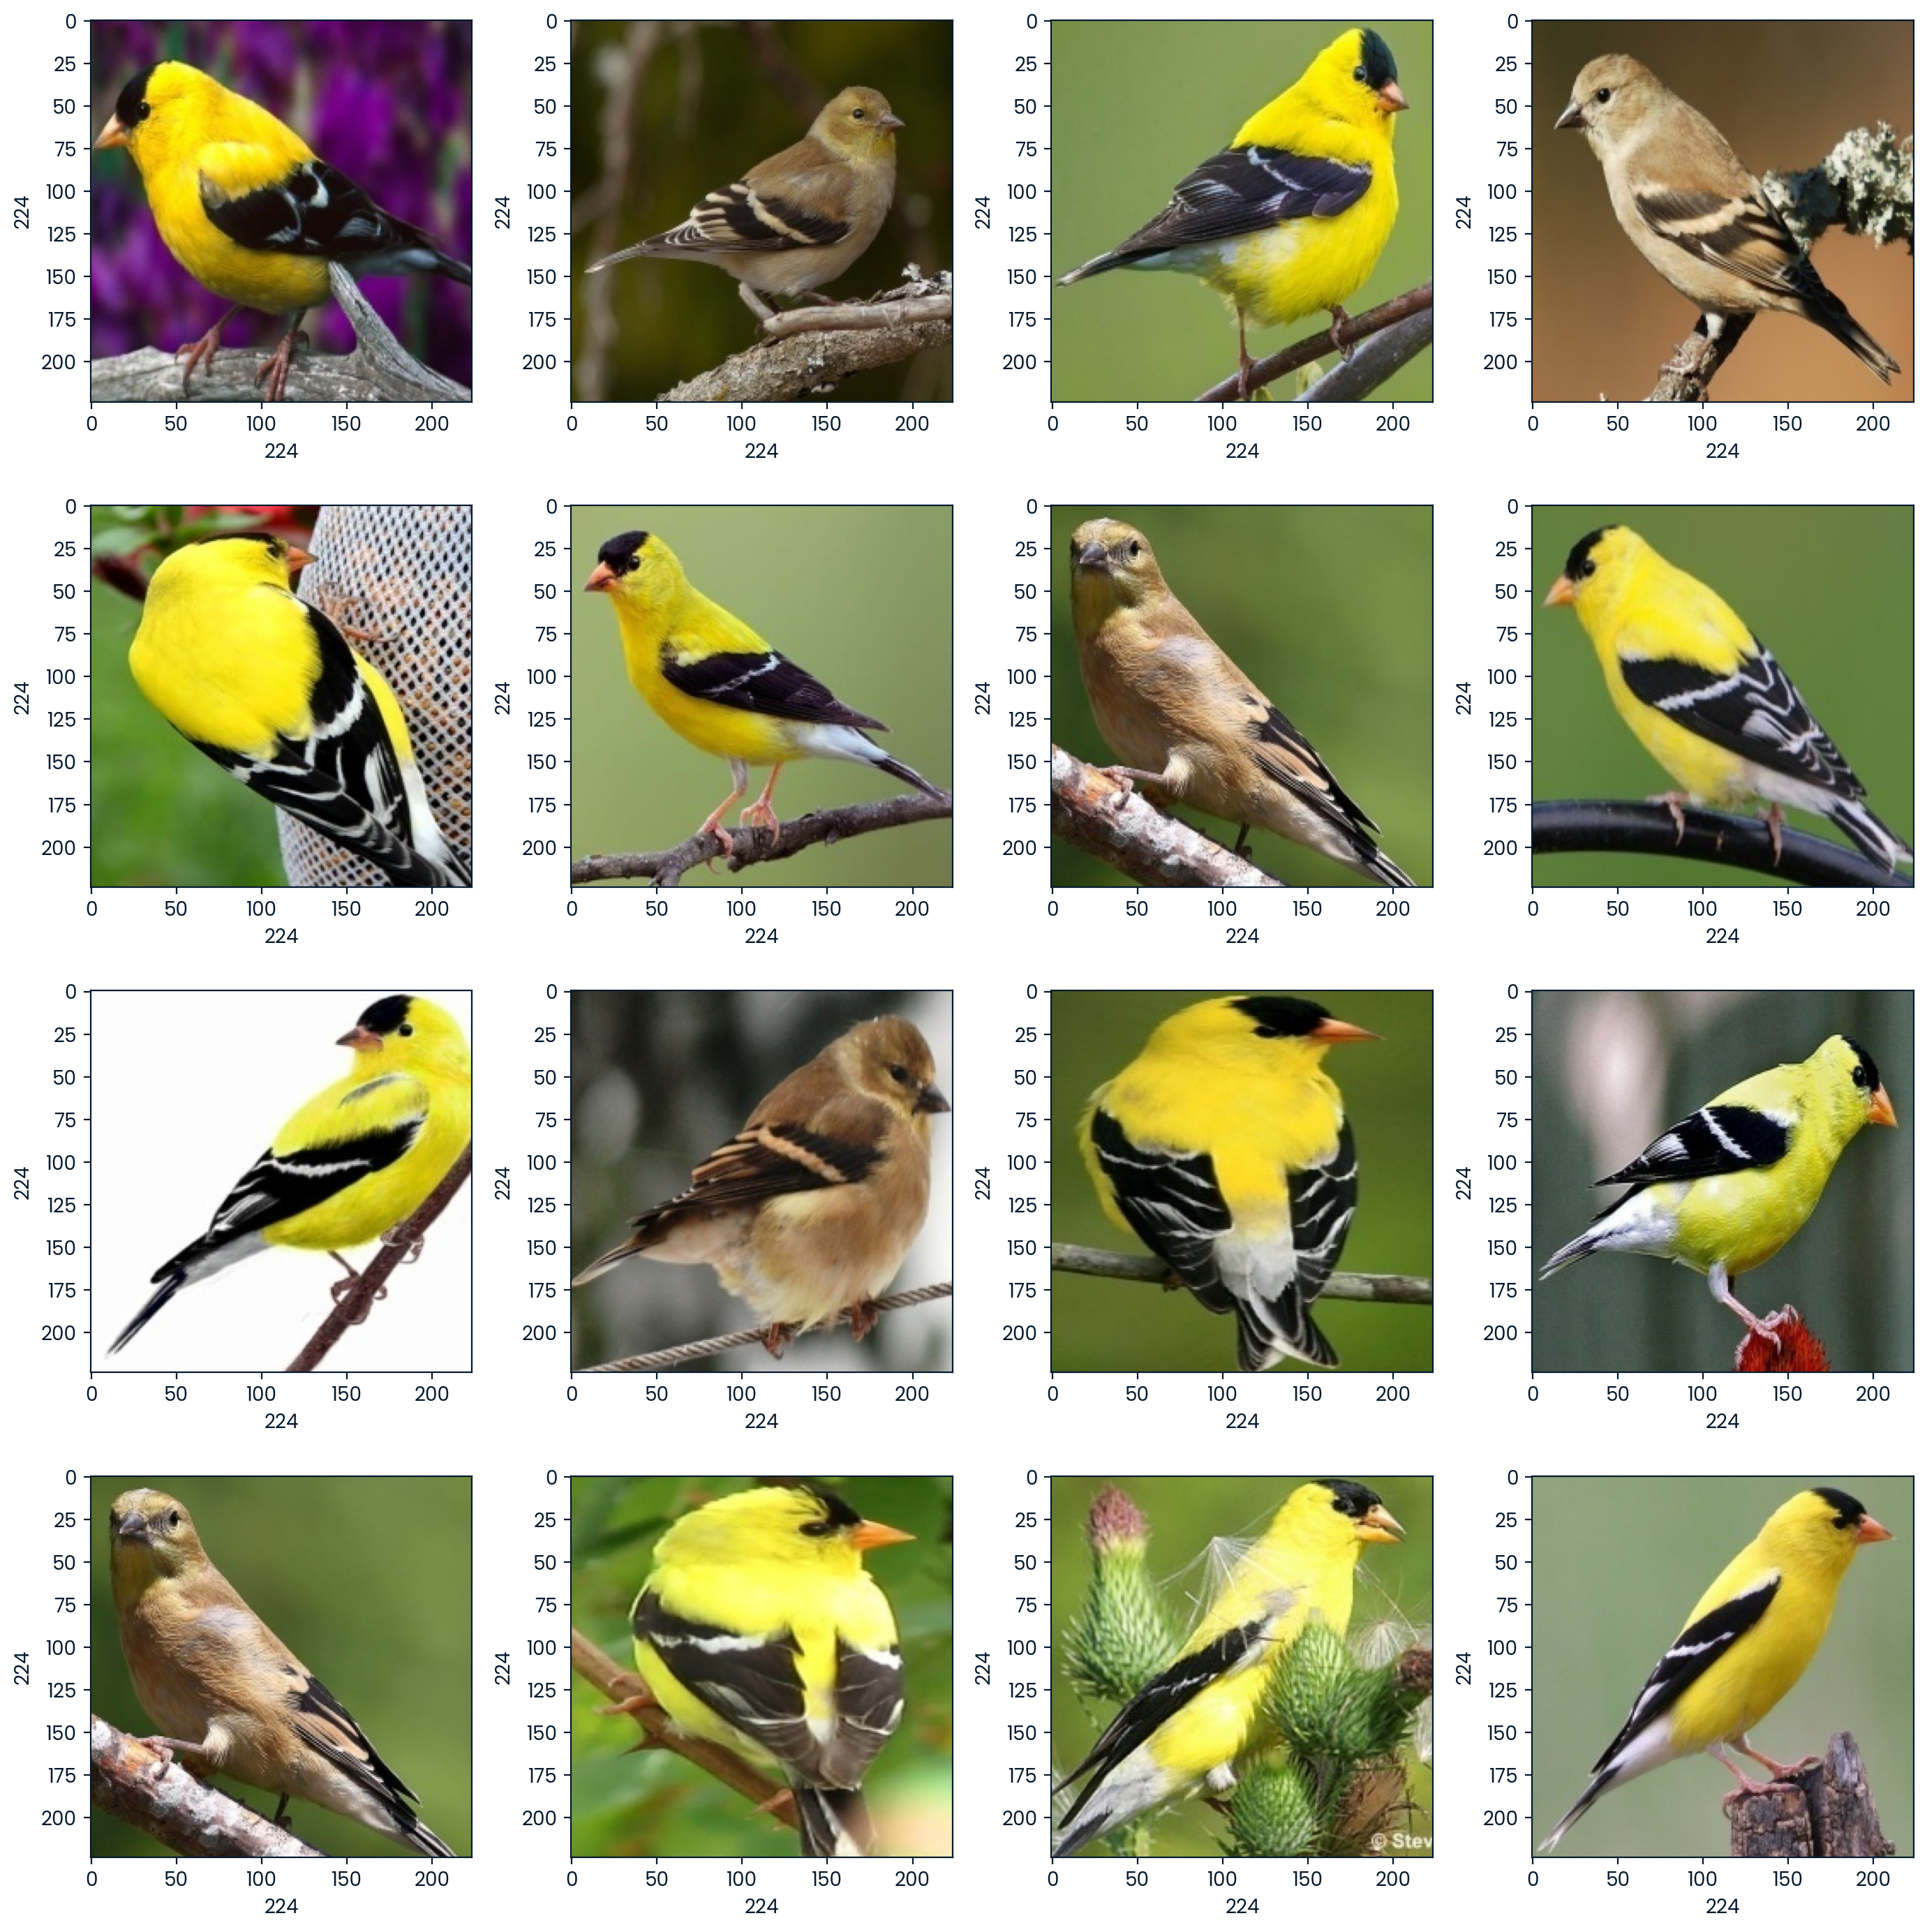

In [18]:
# Plot 14 images to check dataset
plt.figure(figsize=(14,14))
path = "dataset/AMERICAN GLODFLINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

Now we will set the root directory for the dataset and stroing all folders name of the dataset. We will also create 2 empty list for image and tables.

In [19]:
# Set path and creating empty list
dir = "dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

## Step 3:  Read all the images and convert it into array 

In [20]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

## Step 4:  Check for class imbalance

In [21]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

0                  
AMERICAN GLODFLINCH    143
EMPEROR PENGUIN        139
DOWNY WOODPECKER       137
FLAMINGO               132
CARMINE BEE EATER      131
BARN OWL               129
Name: count, dtype: int64

In [22]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [23]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(811,)

In [29]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

## Step 5:  Split dataset into train and test

In [24]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

## Step 6:  Normalize the images and Reshape x_train and x_test

In [25]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

## Step 7:  Label binarizing

In [26]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GLODFLINCH' 'BARN OWL' 'CARMINE BEE EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


## Step 8: Split train data into validation and train data

In [27]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

## Step 9:  Create a network architecture for the model

In [30]:
# Build Model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

## Step 10:  Compile the model

In [31]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

## Step 11:  Training the model

In [32]:
# Training the model
epochs=50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 0.1514 - loss: 1.7898 - val_accuracy: 0.1923 - val_loss: 1.7445
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.2456 - loss: 1.7086 - val_accuracy: 0.3923 - val_loss: 1.6854
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - accuracy: 0.4377 - loss: 1.6110 - val_accuracy: 0.3846 - val_loss: 1.6369
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.4507 - loss: 1.5075 - val_accuracy: 0.4462 - val_loss: 1.4828
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.5393 - loss: 1.3426 - val_accuracy: 0.5154 - val_loss: 1.3143
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 0.6120 - loss: 1.1818 - val_accuracy: 0.5615 - val_loss: 1.2368
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 0.6003 - loss: 1.0833 - val_accuracy: 0.5154 - val_loss: 1.2559
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 0.5359 - loss: 1.1317 - val_accuracy: 0.6000 - val_loss:

## Step 12: Saving the model

In [34]:
# Saving model
model.save("bird_species.h5")

This model saving in h5 format will help us to use it later for prediction

## Step 13: Plot the training history

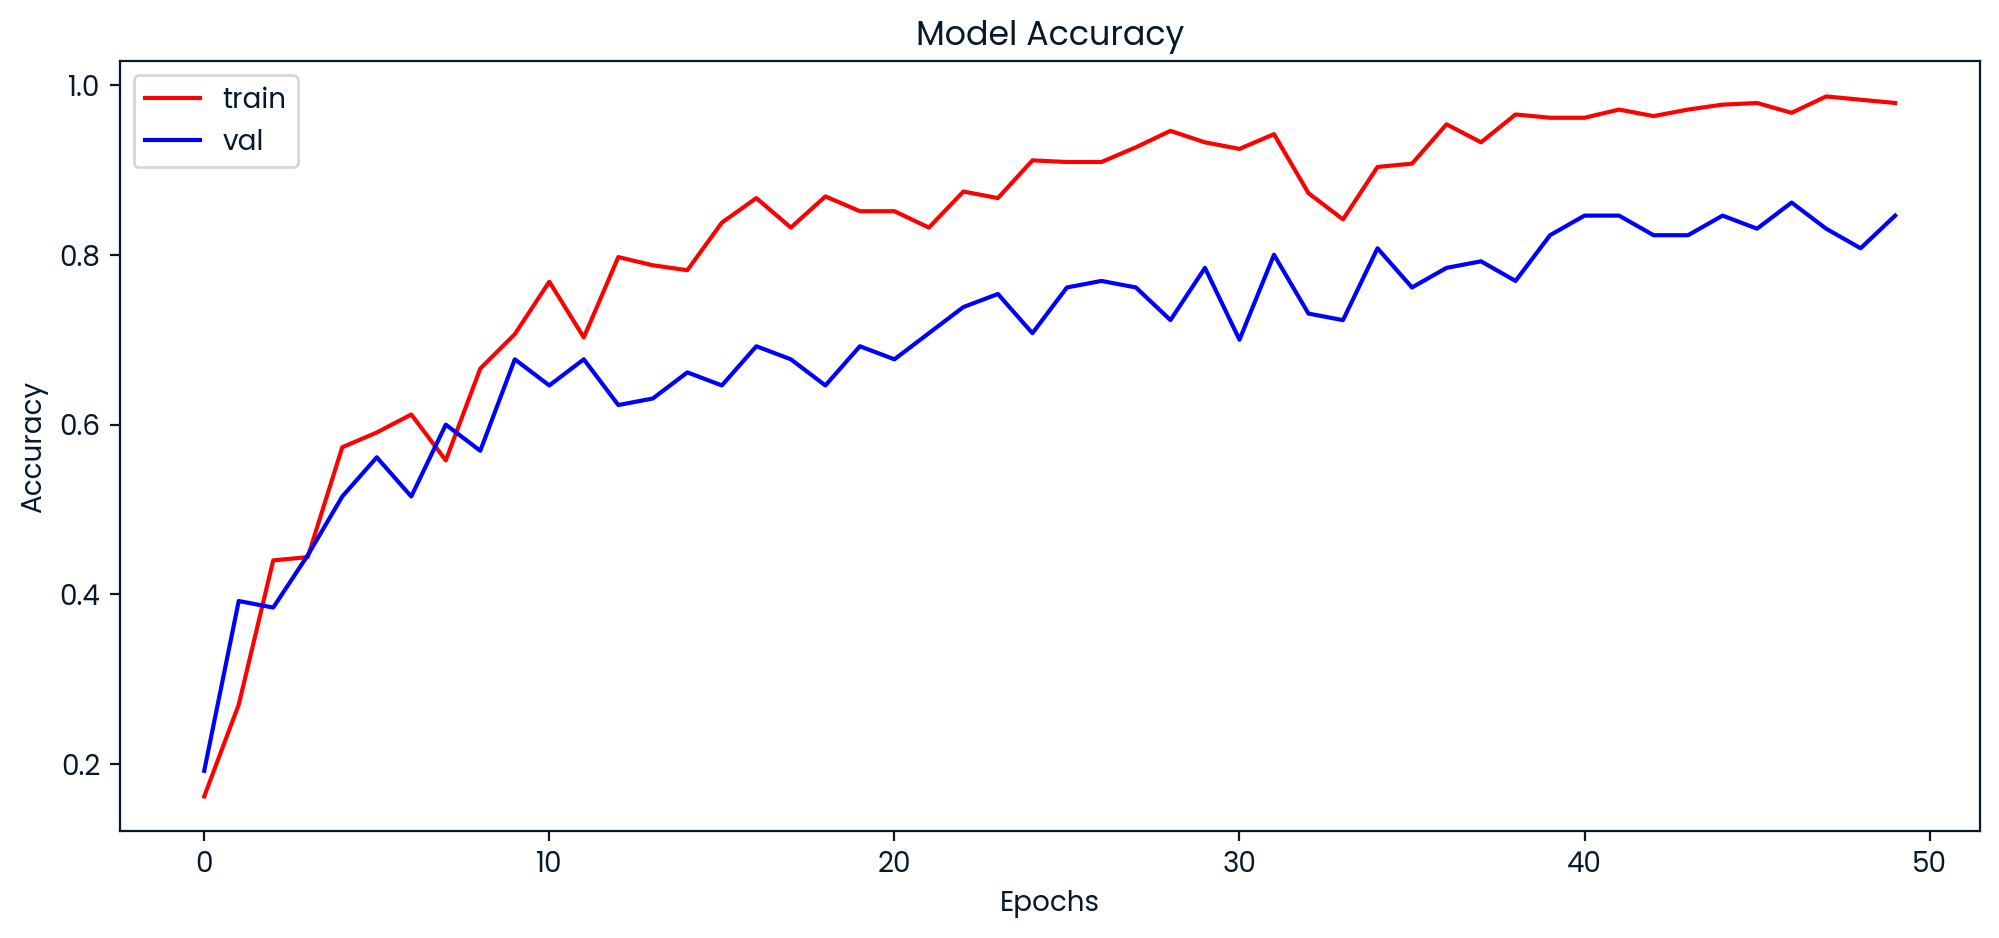

In [35]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

## Step 14: Plot the loss history

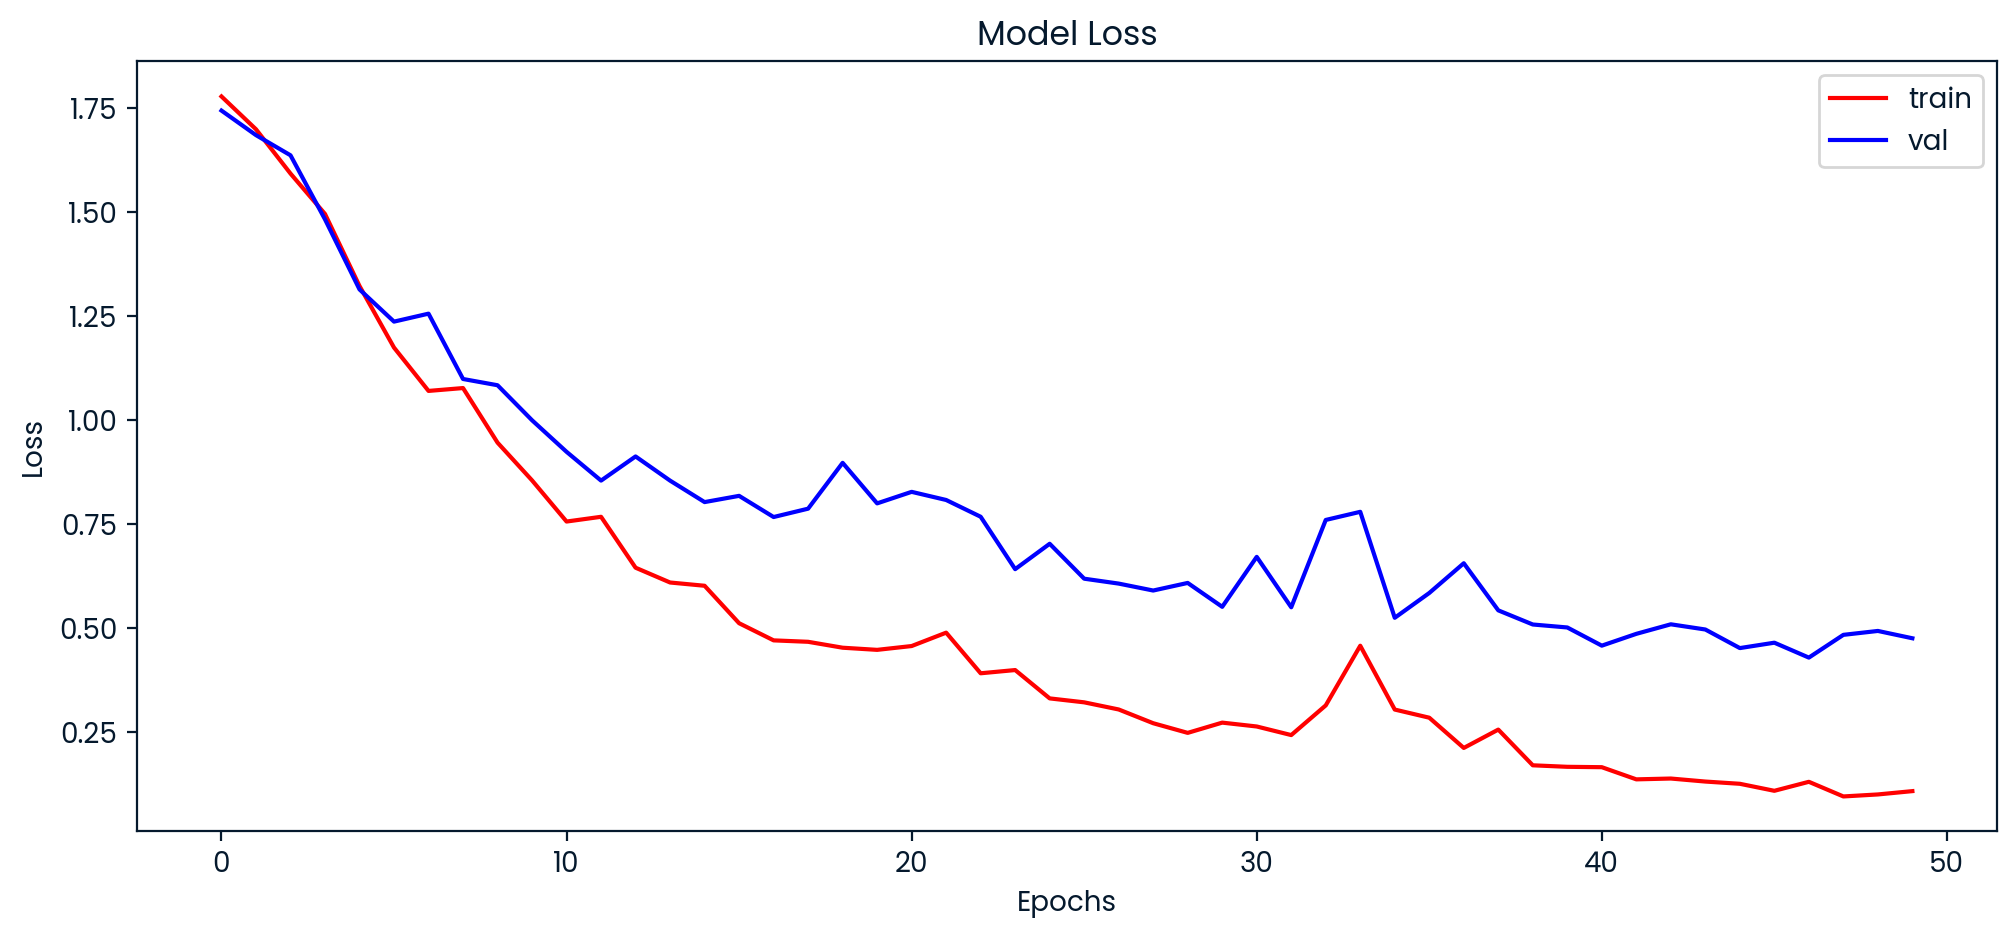

In [36]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

## Step 15: Calculate test accuracy

In [37]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8386 - loss: 0.4087
Test Accuracy: 84.04908180236816


Here we are evaluating the model to know the accuracy of the model on the test data

In [38]:
# Storing predictions
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


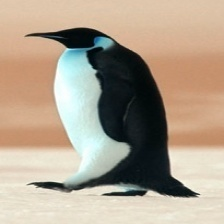

In [39]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

Here we are visualizing one of the images which will be futher usedd for prediction

In [40]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GLODFLINCH' 'BARN OWL' 'CARMINE BEE EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  EMPEROR PENGUIN
Predicted :  EMPEROR PENGUIN
